# Градиентный бустинг

## Для задач регрессии

1. Обучим простой алгоритм:

### $$ b_1 (x) = \arg \min \limits_{b} \frac{1}{l} \sum\limits_{i=1}^{l} (b(x_i) - y_i)^2 $$

2. Как исправить ошибки $ b_1(x) $?

### $$ b_1(x_i) + b_2(x_i) = y_i $$

3. $ b_2 $ - специальная модель, которая предсказывает необходимые исправления ответов модели $ b_1 $:

### $$ b_2(x) = \arg \min \limits_b \frac{1}{l} \sum\limits_{i=1}^l (b(x_i) - (y_i - b_1(x_i)))^2 $$

**Бустинг** - направленное построение композиции, в отличие от случайного леса, который строится случайно.

## $$ b_N(x) = \arg \min \limits_b \frac{1}{l} \sum\limits_{i=1}^l (b(x_i) - (y_i - \sum\limits_{n=1}^{N-1} b_n(x_i)))^2 $$

Здесь мы итеративно настраиваемся в сторону меньшей ошибки.

<div align="center"><img src="images/8.png" width="400"/></div>

## Итерация градиентного бустинга

1. Уже построили N-1 алгоритмов:

### $$ a_{N-1}(x) = \sum\limits_{n=0}^{N-1}b_n(x) $$

2. Нужно минимизировать функционал ошибки:

### $$ \sum\limits_{i=1}^l L(y_i, a_{N-1}(x_i) + b(x_i)) \rightarrow \min\limits_b $$

3. Ищем оптимальный сдвиг:

### $$ b(x_i) = s_i, $$
### $$ s = -\nabla L = (-L_z'(y_1, a_{N-1}(x_1)), ..., -L_z'(y_l, a_{N-1}(x_l)) $$

## Обучение базового алгоритма

### $$ b_N(x) = \arg\min\limits_b \frac{1}{l} \sum\limits_{i=1}^l(b(x_i) - s_i)^2 $$

- вся информация о функции потерь содержится в сдвигах $ s_i $
- для новой задачи оптимизации можем использовать среднеквадратичную ошибку независимо от исходной задачи

## Общий алгоритм градиентного бустинга

- Построить начальный алгоритм $ b_0(x) $
- Для $ n = 1, ..., N $:
  - Вычислить сдвиги:
        $ s_i = -L_z'(y_1, a_{N-1}(x_1)), ..., -L_z'(y_l, a_{N-1}(x_l)) $
  - Обучить новый базовый алгоритм:
        $ b_N(x) = \arg\min\limits_b \frac{1}{l} \sum\limits_{i=1}^l(b(x_i) - s_i)^2 $
  - Добавить алгоритм в композицию:
        $ a_n(x) = \sum\limits_{m=1}^{m}b_m(x) $

Получается, что:

- градиентный бустинг последовательно строит композицию
- базовый алгоритм приближает антиградиент функции ошибки
- результат - градиентный спуск в пространстве алгоритмов

Возможен также стохастический градиентный бустинг, когда каждый алгоритм обучается по случайной подвыборке объектов.

### Градиентный бустинг для задачи классификации

- регрессор, который предсказывает вероятность принадлежности к классу

## Градиентный бустинг над решающими деревьями

- базовый алгоритм - решающее дерево
- прогнозы в листьях подбираются под исходную функцию потерь
- структура дерева настраивается по MSE

Перенастройка в листьях:

### $$ \sum\limits_{i=1}^lL(y_i, a_{N-1}(x) + \sum\limits_{j=1}^J[x \in R_{N_j}]b_j) \rightarrow \min\limits_{b_1, ..., b_J} $$

## Реализация градиентного бустинга

- sklearn (в боевых задачах работает плохо)
- xgboost
- lightgbm
- catboost (от Яндекса)

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
l = data['data'].shape[0]
X_train, X_test = data['data'][:int(0.75 * l)], data['data'][int(0.75 * l):]
y_train, y_test = data['target'][:int(0.75 * l)], data['target'][int(0.75 * l):]

In [2]:
y_train

array([4.526, 3.585, 3.521, ..., 1.599, 1.585, 2.027])

In [7]:
# catboost надо установить
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 2.2 MB/s eta 0:00:0000:0100:01


In [6]:
!pip install wheel setuptools pip --upgrade
!pip3 install wheel setuptools pip --upgrade


  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.40.0
    Uninstalling wheel-0.40.0:
      Successfully uninstalled wheel-0.40.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.0.0
    Uninstalling setuptools-68.0.0:
      Successfully uninstalled setuptools-68.0.0
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.4 which is incompatible.
tensorflow 2.13.0 requires t

In [8]:
from catboost import CatBoostRegressor
import numpy as np

scores = np.ndarray([10, 10])

Основные параметры градиентного бустинга над решающими деревьями:

- максимальная глубина деревьев
- количество деревьев (по сути - количество итераций коррекции предсказаний)

In [9]:
%%time

best_score = 10000000
for i, n_trees in enumerate(np.linspace(1, 100, 10)):
    for j, depth in enumerate(np.arange(2, 12)):
        p = CatBoostRegressor(n_estimators=n_trees, max_depth=depth).fit(X_train, y_train).predict(X_test)
        scores[i, j] = mean_squared_error(y_test, p)
        if scores[i, j] < best_score:
            best_score = scores[i, j]

Learning rate set to 0.5
0:	learn: 0.9486390	total: 68ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.9113636	total: 1.42ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8769436	total: 1.65ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8447147	total: 1.84ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8206848	total: 2.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8146354	total: 3.83ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8105047	total: 4.42ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8065489	total: 7.2ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.7989805	total: 27.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8022851	total: 33.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.9486390	total: 1.27ms	remaining: 14ms
1:	learn: 0.8404266	total: 2.47ms	remaining: 12.4ms
2:	learn: 0.7763814	total: 3.71ms	remaining: 11.1ms
3:	learn: 0.7347423	total: 4.8ms	remaining: 9.6ms
4:	learn: 0.6930369	total: 5.86ms	r

In [10]:
best_score

0.48609324064464576

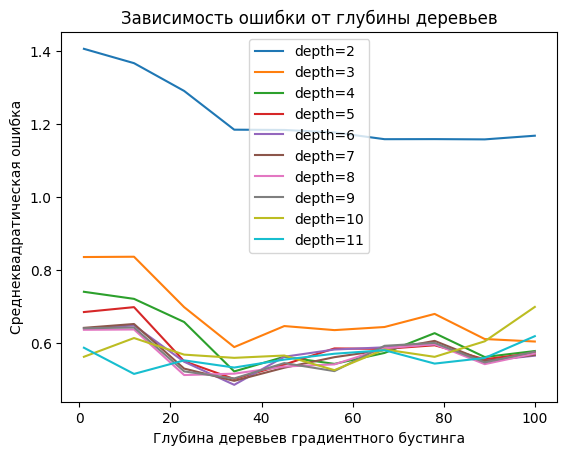

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

for i in range(scores.shape[0]):
    plt.plot(np.linspace(1, 100, 10), scores[i], label='depth=' + str(np.arange(2, 12)[i]))
plt.xlabel("Глубина деревьев градиентного бустинга")
plt.ylabel("Среднеквадратическая ошибка")
plt.title("Зависимость ошибки от глубины деревьев")
plt.legend()

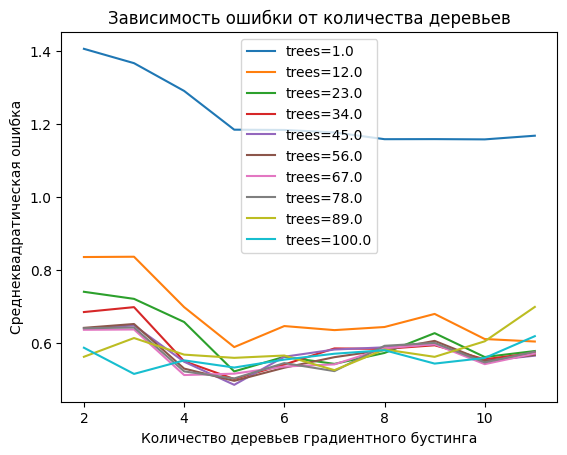

In [12]:
for i in range(scores.shape[1]):
    plt.plot(np.arange(2, 12), scores[i], label='trees=' + str(np.linspace(1, 100, 10)[i]))
plt.xlabel("Количество деревьев градиентного бустинга")
plt.ylabel("Среднеквадратическая ошибка")
plt.title("Зависимость ошибки от количества деревьев")
plt.legend()

Сравним со случайным лесом:

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
%%time

linear_preds = RandomForestRegressor(n_estimators=100).fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, linear_preds) ** 0.5


CPU times: user 10.4 s, sys: 180 ms, total: 10.6 s
Wall time: 10.8 s


0.7693763543708781

In [17]:
boosting_preds = CatBoostRegressor(n_estimators=100, max_depth=None).fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, boosting_preds) ** 0.5

Learning rate set to 0.410358
0:	learn: 0.8646038	total: 12.3ms	remaining: 1.22s
1:	learn: 0.7317900	total: 14.1ms	remaining: 689ms
2:	learn: 0.6599668	total: 16.1ms	remaining: 521ms
3:	learn: 0.6223510	total: 17.8ms	remaining: 427ms
4:	learn: 0.5871664	total: 20ms	remaining: 380ms
5:	learn: 0.5724893	total: 21.8ms	remaining: 342ms
6:	learn: 0.5561959	total: 23.6ms	remaining: 314ms
7:	learn: 0.5484293	total: 25.4ms	remaining: 292ms
8:	learn: 0.5411740	total: 27ms	remaining: 273ms
9:	learn: 0.5312712	total: 28.8ms	remaining: 259ms
10:	learn: 0.5235964	total: 30.6ms	remaining: 247ms
11:	learn: 0.5147716	total: 32.4ms	remaining: 238ms
12:	learn: 0.5096099	total: 34.4ms	remaining: 230ms
13:	learn: 0.5069839	total: 36.2ms	remaining: 223ms
14:	learn: 0.5017204	total: 38ms	remaining: 215ms
15:	learn: 0.4979257	total: 39.7ms	remaining: 208ms
16:	learn: 0.4937948	total: 41.4ms	remaining: 202ms
17:	learn: 0.4892052	total: 43.2ms	remaining: 197ms
18:	learn: 0.4865236	total: 45.1ms	remaining: 192m

0.7450737832912717

## Классификация

Сравним разделяющие поверхности градиентного бустинга и случайного леса:

In [18]:
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# генерация данных: два класса, расположенных один в другом
X, y = make_circles(n_samples=300, factor=0.1, noise=0.35, random_state=42)

# напишем функцию для изуализации границы принятия решений
def plot_decision_boundary(model, X, y):
    fig, ax = plt.subplots()
    x0_min, x0_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, 300), np.linspace(x1_min, x1_max, 300))
    border_predictions = model.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
    ax.contourf(x0, x1, border_predictions, alpha=0.1, cmap=plt.cm.autumn)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.autumn, edgecolor='k')
    ax.set_title(f"{model.__class__.__name__}: граница принятия решений")
    fig.set_size_inches((7, 7))

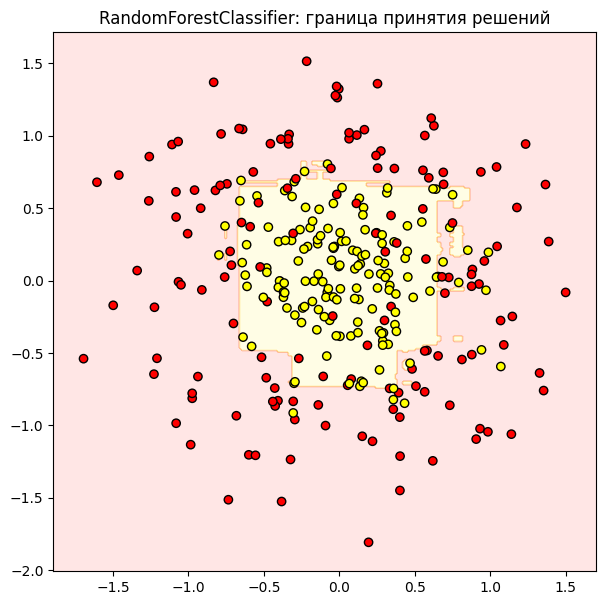

In [19]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5).fit(X, y)
plot_decision_boundary(forest, X, y)
plt.show()

Learning rate set to 0.050894
0:	learn: 0.6772312	total: 5.18ms	remaining: 513ms
1:	learn: 0.6625136	total: 5.59ms	remaining: 274ms
2:	learn: 0.6478712	total: 5.81ms	remaining: 188ms
3:	learn: 0.6351940	total: 6.26ms	remaining: 150ms
4:	learn: 0.6246853	total: 6.73ms	remaining: 128ms
5:	learn: 0.6152001	total: 7.09ms	remaining: 111ms
6:	learn: 0.6028890	total: 7.42ms	remaining: 98.5ms
7:	learn: 0.5914212	total: 7.76ms	remaining: 89.3ms
8:	learn: 0.5834100	total: 8ms	remaining: 80.9ms
9:	learn: 0.5737993	total: 8.22ms	remaining: 74ms
10:	learn: 0.5639337	total: 8.53ms	remaining: 69.1ms
11:	learn: 0.5573045	total: 8.79ms	remaining: 64.4ms
12:	learn: 0.5495300	total: 9.09ms	remaining: 60.8ms
13:	learn: 0.5438439	total: 9.3ms	remaining: 57.1ms
14:	learn: 0.5370717	total: 9.51ms	remaining: 53.9ms
15:	learn: 0.5303954	total: 9.71ms	remaining: 51ms
16:	learn: 0.5229136	total: 10.1ms	remaining: 49.3ms
17:	learn: 0.5158012	total: 10.4ms	remaining: 47.2ms
18:	learn: 0.5099722	total: 10.6ms	remai

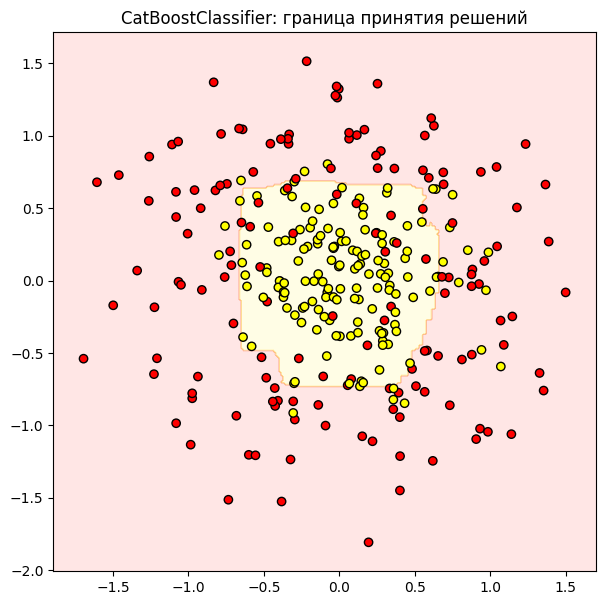

In [20]:
forest = CatBoostClassifier(n_estimators=100, max_depth=5).fit(X, y)
plot_decision_boundary(forest, X, y)
plt.show()